# Code Example: Visualizing Marginal Distributions of One Variable

Here is a visualization of marginalized distributions as a sum of finer-grained distributions.
The mango data above is used to show the marginal distribution by yellowness, broken up by the softness variable in the original data.

Note that the sum of probabilities is unchanged.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

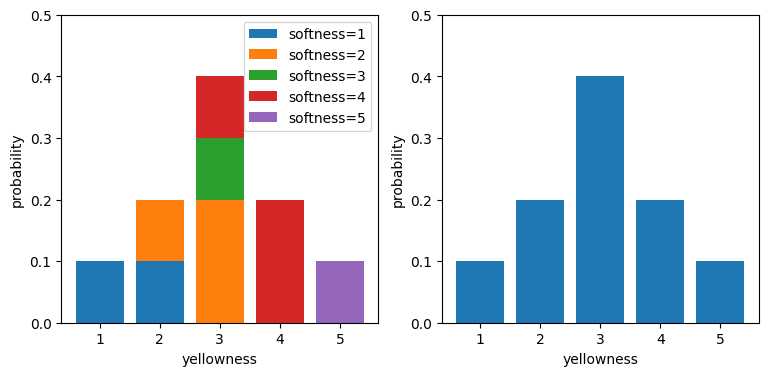

In [ ]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)

yellowness_values = sorted(set(r[0] for r in mango_data))
softness_values = sorted(set(r[1] for r in mango_data))
cumulative_probabilities = np.asarray([0.0 for _ in yellowness_values])

plt.gca().set_ylim((0, 0.5))
for s in softness_values:
    current_probabilities = [mango_distribution.get((y, s), 0.0) for y in yellowness_values]
    plt.bar(yellowness_values,
            current_probabilities,
            label=f"softness={s}",
            bottom=cumulative_probabilities)

    cumulative_probabilities += current_probabilities
plt.xlabel("yellowness")
plt.ylabel("probability")
plt.legend()

plt.subplot(1, 2, 2)

plt.gca().set_ylim((0, 0.5))
yellowness_distribution = build_marginal_from_distribution(mango_distribution, [0])
plt.bar(yellowness_values, [yellowness_distribution[(y,)] for y in yellowness_values])
plt.xlabel("yellowness")
plt.ylabel("probability")

None

**Chart Notes:**
* The total shapes of the histograms are the same.
  * The left histogram shows the breakdown by yellowness and softness, matching the original data.
  * The right histogram removes the breakdowns on softness, just showing the marginal distribution of yellowness.
* Marginalizing this distribution essentially removes the distinctions between softness values in the left histogram.

**Code Notes:**
* The Matplotlib function [`matplotlib.pyplot.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html), referenced as `plt.figure`, creates the figure.
  * The optional `figsize` arguments sets the figure size, and takes in a tuple of width and height in inches.
  * The `figure` function does not need to be called explicitly unless you want to override some of the figure settings.
* The Matplotlib function [`matplotlib.pyplot.subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html), referenced as `plt.subplot`, specifies that the figure will be divided into multiple plots and selects one.
  * The arguments passed here are the number of rows, number of columns, and index of the subplot. The subplot index is 1-based, so the first subplot has index 1. Most Python data structures are 0-based, but Matlab, whose plot function inspired Matplotlib, is 1-based.
* The Matplotlib function [`matplotlib.pyplot.gca`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html), referenced as `plt.gca`, returns an axis object.
  * In this code, the axis object's `set_ylim` method is used to set the range of y values. The automatic range code was picking 0.40 and ~0.42, which adds distracting differences when comparing them.
* The same visualization can be used for marginal distributions of multiple variables (or a single non-numeric variable) if you use a non-numeric x-axis.
However, this will be hard to interpret if you have too many distinct variable combinations.